In [1]:
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10 # Importing cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Splitting it into training and testing data

for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[6]


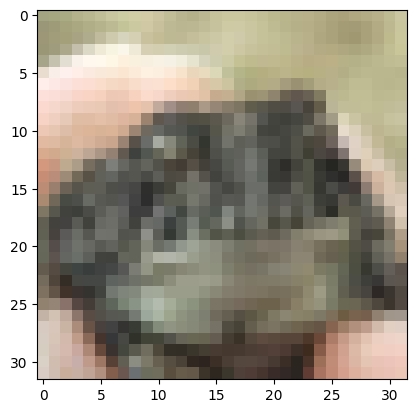

In [3]:
plt.imshow(x_train[25])
print(y_train[25])
plt.show()

In [4]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [5]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train.shape, y_test.shape)


(50000, 10) (10000, 10)


In [9]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1604 - loss: 2.2234 - val_accuracy: 0.2842 - val_loss: 1.9187
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.3463 - loss: 1.7990 - val_accuracy: 0.3838 - val_loss: 1.7451
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4330 - loss: 1.5617 - val_accuracy: 0.4822 - val_loss: 1.4476
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4910 - loss: 1.4231 - val_accuracy: 0.5087 - val_loss: 1.3553
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5231 - loss: 1.3332 - val_accuracy: 0.5229 - val_loss: 1.3488
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5562 - loss: 1.2619 - val_accuracy: 0.5676 - val_loss: 1.2029
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5783 - loss: 1.1891 - val_accuracy: 0.5932 - val_loss: 1.1562
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6071 - loss: 1.1170 

<Axes: >

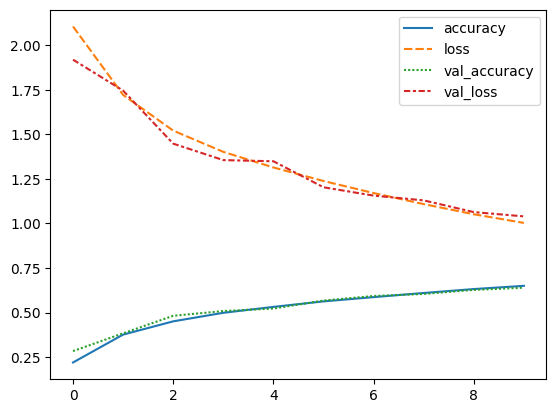

In [11]:
import seaborn as sns
sns.lineplot(model.history.history)

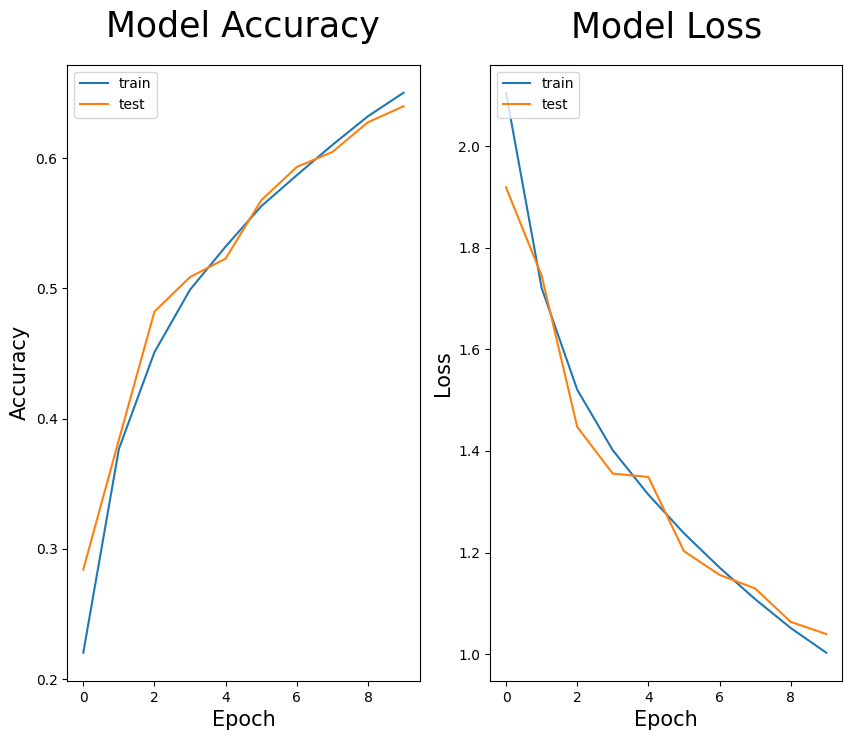

In [12]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

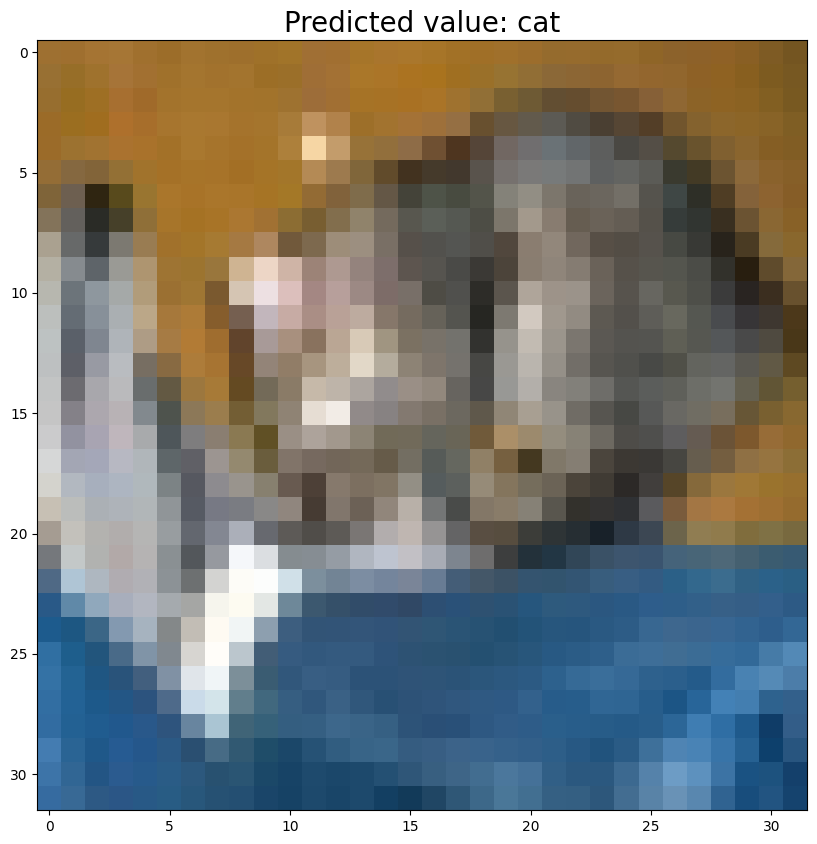

In [15]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)

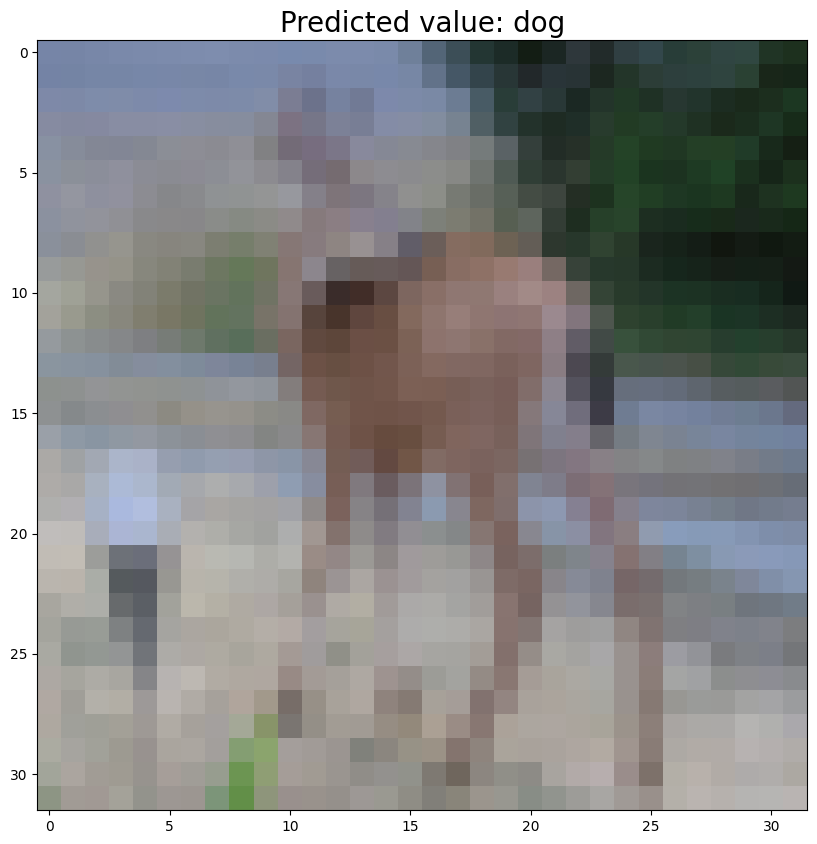

In [16]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[100].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[100], axis=0)]), size=20)
plt.grid(False)